In [1]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import scipy.io
import pandas as pd
from skimage import color
from skimage import io
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
ctScans = scipy.io.loadmat('/content/drive/My Drive/CCE-AIMIA/ctscan_embeddings_hw2.mat')

In [3]:
print(ctScans['feat'].shape)
X = ctScans['feat']

(3554, 1024)


In [4]:
pca_dims = PCA()
pca_dims.fit(X)
cumsum = np.cumsum(pca_dims.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print(d)

33


In [5]:
#n_components=100
n_components=50 

In [6]:
pca = PCA(n_components)
X_reduced = pca.fit_transform(X)
X_recon = pca.inverse_transform(X_reduced)

In [7]:
print("reduced shape: " + str(X_reduced.shape))
print("reconstructed shape: " + str(X_recon.shape))

reduced shape: (3554, 50)
reconstructed shape: (3554, 1024)


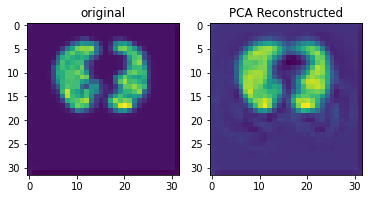

In [8]:
f = plt.figure()
f.add_subplot(1,2, 1)
plt.title("original")
plt.imshow(X[100].reshape((32,32)))
f.add_subplot(1,2, 2)

plt.title("PCA Reconstructed")
plt.imshow(X_recon[100].reshape((32,32)))
plt.show(block=True)

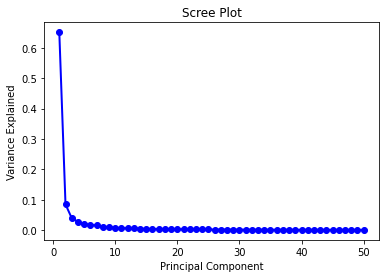

In [9]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [10]:
#function for mean square error
def mse(predict, actual):
    return np.square(predict - actual).sum(axis = 1).mean()

In [11]:
#calculating loss and reconstructing images
loss = []
max_components = 50
print("Processing...")
for num_component in range(1, max_components + 1):
    pca = PCA(num_component)
    X_reduced = pca.fit_transform(X)
    X_recovered = pca.inverse_transform(X_reduced)
    error = mse(X_recovered, X)
    loss.append((num_component, error))
print()
print("Done!")

Processing...

Done!


In [12]:
import plotly.graph_objs as go
#visualizing mse vs number of principal components
result = list(map(list, zip(*loss)))
x, y  = result
trace = go.Scatter(x = x[:], y = y[:])
data = [trace]
fig = go.Figure(data)
fig.update_layout(title = "MSE vs number of principal components", 
                  xaxis_title = "Number of principal components", 
                  yaxis_title = "MSE", template = "plotly_white")
fig.show()